In [17]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json
import numpy as np
import pyodbc
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000



In [9]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [11]:
data = pd.read_csv(parent_path+"/data/csvs/hmda_2017_ca_noname.csv")
print(data.columns)
#print(data['action_taken'])

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [13]:
js_road=parent_path+"/src/data_processing/code_map.json"
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [15]:
image_path=parent_path+'/result/eda/income_analysis'
if not os.path.exists(image_path):
    os.makedirs(image_path)

In [22]:

# Accp income distribution
# Deny income distribution
accp = income.loc[(income['action_taken'] == 1) | (income['action_taken'] == 2) | (income['action_taken'] == 8)]
deny = income.loc[(income['action_taken'] == 3) | (income['action_taken'] == 7)]
print(accp)
print(deny)
#print(income.groupby(['action_taken_name'])['applicant_income_000s'].avg())



#print(df)
fig = plt.figure(figsize =(100, 7))
#avg.plot(x='action_taken',y='applicant_income_000s',kind='bar')
plt.show()
'''

plt.pie(df, labels = cars)
hist_accp = accp.hist(bins=100)
print(hist_accp)
hist_deny = deny.hist(bins=2)
print(hist_deny)

'''


         applicant_income_000s  action_taken                action
2                        278.0             1  Institution approved
4                         86.0             2  Institution approved
5                         97.0             1  Institution approved
6                        143.0             1  Institution approved
9                         90.0             1  Institution approved
...                        ...           ...                   ...
1157534                    NaN             2  Institution approved
1157535                    NaN             2  Institution approved
1157536                    NaN             2  Institution approved
1157537                    NaN             2  Institution approved
1157538                    NaN             2  Institution approved

[931357 rows x 3 columns]
         applicant_income_000s  action_taken              action
0                        144.0             3  Institution denied
1                         51.0         

<Figure size 7200x504 with 0 Axes>

'\n\nplt.pie(df, labels = cars)\nhist_accp = accp.hist(bins=100)\nprint(hist_accp)\nhist_deny = deny.hist(bins=2)\nprint(hist_deny)\n\n'

In [41]:
def divi(x):
    if x >=500:
        return '500.0k+'
    elif x==x: 
        flor = x//50
        return str(flor*50)+'k+'
    else:
        return 'Unknown'

In [45]:
accp.sort_values('applicant_income_000s', ascending=True)

,applicant_income_000s,action_taken,action
175235,1.0,1,Institution approved
943728,1.0,1,Institution approved
224433,1.0,1,Institution approved
535627,1.0,1,Institution approved
920997,1.0,1,Institution approved
...,...,...,...
1157534,NaN,2,Institution approved
1157535,NaN,2,Institution approved
1157536,NaN,2,Institution approved
1157537,NaN,2,Institution approved


<AxesSubplot:>

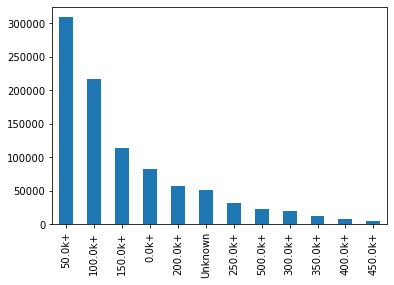

In [44]:
accp.sort_values('applicant_income_000s', ascending=True)['applicant_income_000s'].apply(divi).value_counts().plot.bar()

<AxesSubplot:>

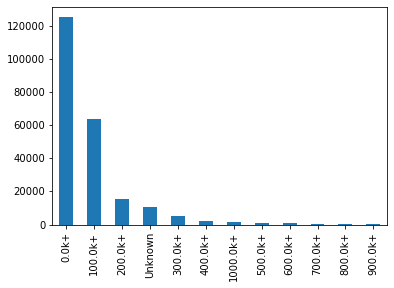

In [39]:
deny['applicant_income_000s'].apply(divi).value_counts().plot.bar()

<ipython-input-40-4bc7ffc45b0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_b['action']= income['action_taken'].replace(RecodeAction)
<ipython-input-40-4bc7ffc45b0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_b['income_group'] = income_b['applicant_income_000s'].apply(divi)


         applicant_income_000s  action_taken                action  \
0                        144.0             3    Institution denied   
1                         51.0             3    Institution denied   
2                        278.0             1  Institution approved   
3                        125.0             3    Institution denied   
4                         86.0             2  Institution approved   
...                        ...           ...                   ...   
1157690                    NaN             3    Institution denied   
1157691                    NaN             3    Institution denied   
1157692                    NaN             3    Institution denied   
1157693                    NaN             3    Institution denied   
1157694                    NaN             3    Institution denied   

        income_group  
0            100.0k+  
1              0.0k+  
2            200.0k+  
3            100.0k+  
4              0.0k+  
...              ... 

Text(0, 0.5, 'count')

<Figure size 432x288 with 0 Axes>

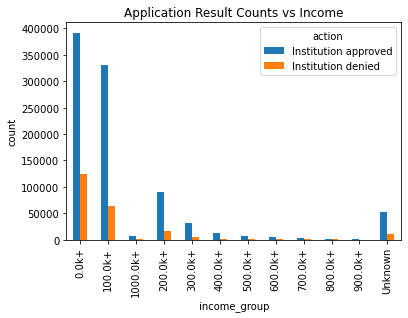

In [40]:
income = data[['applicant_income_000s','action_taken']]
#print(income)
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
income_b=income
income_b['action']= income['action_taken'].replace(RecodeAction)


income_b['income_group'] = income_b['applicant_income_000s'].apply(divi)
print(income_b)
income_a1=income_b.pivot_table(index='income_group', columns='action',aggfunc='size',fill_value=0)
plt.figure()
income_a1.plot.bar(title='Application Result Counts vs Income')
plt.ylabel('count')
#plt.xticks(rotation=360)